#Basic Analysis of a Graph with NetworkX

full network:
- Density
- Clustering Coefficient
- Community Detection (has bugs loading the package)

individual nodes:
- Degree Centrality
- Eigenvector Centrality
- PageRank
- weighted PageRank
- Betweenness Centrality

In [94]:
import pandas as pd
import networkx as nx
import nxviz as nv 
#from nxviz import annotate
#import community
#import community as community_louvain
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [61]:
G = nx.read_gpickle("followerCount.pickle")

In [62]:
#inspect graph object
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 22
Number of edges: 231
Average degree:  21.0000


In [63]:
#FITLER OUT EDGES 
def filter_graph(G, minimum_amount):
    """
    Filter the graph such that
    only edges that have minimum_amount or more of followerCount and sharedFollowers
    are present.
    """
    G_filtered = G.copy()
    for u, v, d in G.edges(data=True):
        if d["amount"] < minimum_amount:
            G_filtered.remove_edge(u, v)
    for n,d in G.nodes(data=True):
        if d["followerCount"] < minimum_amount:
            G_filtered.remove_node(n)
    return G_filtered

In [64]:
G = filter_graph(G,5000)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 17
Number of edges: 21
Average degree:   2.4706


In [65]:
#add inverse weight to edge metadata
for _,_,d in G.edges(data=True):
    if d["amount"]>0:
        d["inv_amount"]=1/d["amount"]

    else:
        d["inv_amount"]=0
         

In [66]:
#normalize edge weights by sum of all edges weights
sum_amounts=sum([d["amount"] for _,_,d in G.edges(data=True)])
#print(sum_amounts)
for _,_,d in G.edges(data=True):
    if d["amount"]>0:
        d["amount_norm"]=d["amount"]/sum_amounts

    else:
        d["inv_amount"]=0 

In [67]:
print(list(G.nodes(data=True))[0:21])

[('DerKeller15', {'id': 1, 'followerCount': 48037}), ('Broeki2', {'id': 2, 'followerCount': 36999}), ('BasoStream', {'id': 3, 'followerCount': 36775}), ('Lara_Loft', {'id': 12, 'followerCount': 86413}), ('Tayronlivereal', {'id': 14, 'followerCount': 28651}), ('DennisWerth_', {'id': 15, 'followerCount': 69776}), ('PainLivestream', {'id': 16, 'followerCount': 65306}), ('mortenroyale', {'id': 17, 'followerCount': 57965}), ('BigSpinCR', {'id': 18, 'followerCount': 14420}), ('KalleKoschinsky', {'id': 19, 'followerCount': 51580}), ('katooyoooo', {'id': 21, 'followerCount': 12740}), ('dannyreturns', {'id': 22, 'followerCount': 72536}), ('TrilluXe', {'id': 24, 'followerCount': 103542}), ('itsmahluna', {'id': 25, 'followerCount': 27774}), ('99DAMAGEde', {'id': 26, 'followerCount': 20026}), ('WhiteCatOsu', {'id': 27, 'followerCount': 49901}), ('H0llyLP', {'id': 28, 'followerCount': 84554})]


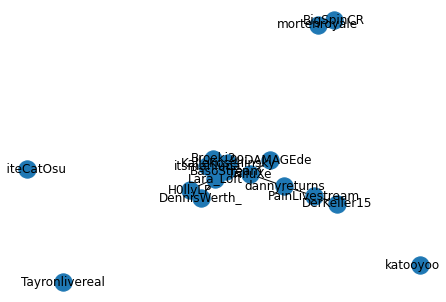

In [71]:
nx.draw(G, with_labels=True)

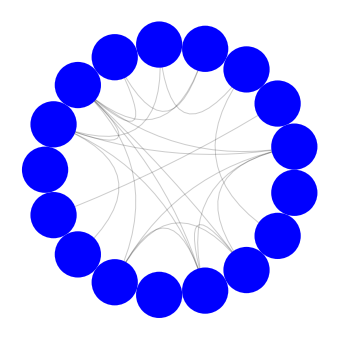

In [106]:

c = nv.plots.CircosPlot(G, node_order='followerCount')
c.draw()
plt.show() 

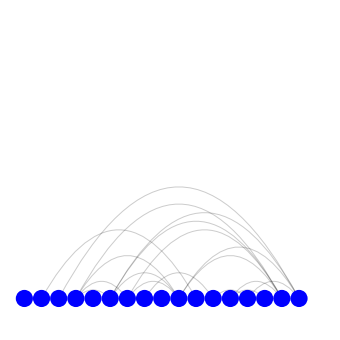

In [138]:
c = nv.plots.ArcPlot(G, node_order='followerCount')
c.draw()
plt.show() 

In [70]:
#How many followers do the isolated nodes have?
isolated_nodes = list(nx.isolates(G))
for node, d in G.nodes(data=True):
    if node in isolated_nodes:
        print(node)
        print(d["followerCount"])


Tayronlivereal
28651
katooyoooo
12740
WhiteCatOsu
49901


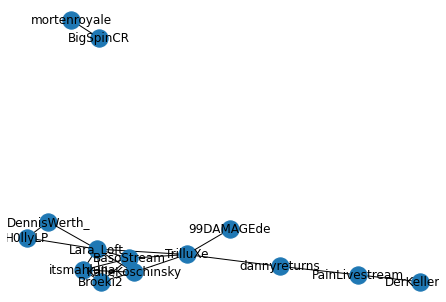

In [40]:
#remove isolated nodes
'''
G.remove_nodes_from(list(nx.isolates(G)))
nx.draw(G, with_labels=True)
'''

In [72]:
#DENSITY: How many edges exist compared to max amount possible edges
density = nx.density(G)
print("Network density:", density)

Network density: 0.15441176470588236


In [73]:
#CLUSTERING COEFFICIENT
nx.average_clustering(G)

0.3722689075630252

Degree Centrality

In [74]:
# We use the in-built degree_centrality method
deg_cen = nx.degree_centrality(G)

In [75]:
print(deg_cen)

{'DerKeller15': 0.0625, 'Broeki2': 0.25, 'BasoStream': 0.3125, 'Lara_Loft': 0.4375, 'Tayronlivereal': 0.0, 'DennisWerth_': 0.125, 'PainLivestream': 0.125, 'mortenroyale': 0.0625, 'BigSpinCR': 0.0625, 'KalleKoschinsky': 0.3125, 'katooyoooo': 0.0, 'dannyreturns': 0.125, 'TrilluXe': 0.3125, 'itsmahluna': 0.25, '99DAMAGEde': 0.0625, 'WhiteCatOsu': 0.0, 'H0llyLP': 0.125}


In [76]:
# The following expression sorts the dictionary by
# degree centrality and returns the top 5 from a graph

sorted(deg_cen.items(),
       key=lambda x:x[1],
       reverse=True)[0:5]

[('Lara_Loft', 0.4375),
 ('BasoStream', 0.3125),
 ('KalleKoschinsky', 0.3125),
 ('TrilluXe', 0.3125),
 ('Broeki2', 0.25)]

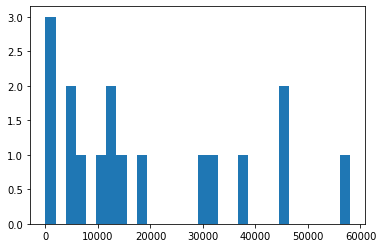

In [77]:
def weighted_degree(G, weight):
    w_deg = {}
    for n in G.nodes():#look at every node
        nbrs = list(G.neighbors(n)) #get nodes neighbors
        nbrs.append(n)
        S = G.subgraph(nbrs)#create a subgraph with the node and its neighbors
        w_deg[n]=sum([d["amount"] for n1,n2,d in S.edges(data=True) if n1==n or n2==n])
    #print(w_deg)
    return w_deg

plt.hist(list(weighted_degree(G, 'amount').values()), bins=30)
plt.show()

In [78]:
#top 5 streamer: Summe der Kantengewichte - wieviele Follower 
#teilt der Knoten mit allen seinen Nachbarn 
sorted(weighted_degree(G, 'amount').items(), key=lambda x:x[1], reverse=True)[0:5]

[('Lara_Loft', 57961),
 ('BasoStream', 45615),
 ('KalleKoschinsky', 44564),
 ('itsmahluna', 38041),
 ('TrilluXe', 31076)]

In [79]:
#EIGENVECTOR CENTRALITY: How many of my neighbors are also important Hubs
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
sorted(eigenvector_dict.items(),
       key=lambda x:x[1], reverse=True)[0:5]

[('Lara_Loft', 0.47163008728357386),
 ('BasoStream', 0.424681690302523),
 ('KalleKoschinsky', 0.424681690302523),
 ('Broeki2', 0.36770412024425697),
 ('itsmahluna', 0.3677041202442569)]

In [89]:
#BETWEENNESS CENTRALITY
# First check unweighted (just the structure)

sorted(nx.betweenness_centrality(G).items(),
       key=lambda x:x[1], reverse=True)[0:5]

[('TrilluXe', 0.2583333333333333),
 ('Lara_Loft', 0.17777777777777778),
 ('dannyreturns', 0.15),
 ('PainLivestream', 0.08333333333333333),
 ('BasoStream', 0.02777777777777778)]

In [85]:
#PAGERANK
# by default weight attribute in PageRank is weight
# so we use weight=None to find the unweighted results
sorted_pr = sorted(nx.pagerank_numpy(G,
                weight=None).items(),
                key=lambda x:x[1], reverse=True)[0:10]

for node in sorted_pr[0:5]:
    print(node)
#-> all have the same PR

('Lara_Loft', 0.126265860146775)
('TrilluXe', 0.10382275559795884)
('KalleKoschinsky', 0.08853654751799296)
('BasoStream', 0.08853654751799286)
('itsmahluna', 0.07087661207785476)


In [81]:
#PageRank using the weights of the edges
#devalue some edges based on their weight.
sorted(nx.pagerank_numpy(
    G, weight='amount').items(),
    key=lambda x:x[1], reverse=True)[0:5]

[('Lara_Loft', 0.12830482398166004),
 ('BasoStream', 0.09652912700761472),
 ('KalleKoschinsky', 0.09463532281880664),
 ('TrilluXe', 0.08445579157533008),
 ('itsmahluna', 0.07989455043872365)]

Ein erster Unterschied im Top-5 Ranking ergibt sich beim gewichteten PageRank (betrachtet auch die Gewichte der Kanten): TrilluXe hat einen höheren PageRank, als BasoStream, obwohl letzerer mehr gemeinsame Follower mit anderen Streamern im Datensatz teilt (56449) als TrilluXe(55197). 

In [84]:
sorted(nx.pagerank_numpy(
    G, weight='amount_norm').items(),
    key=lambda x:x[1], reverse=True)[0:5]

[('Lara_Loft', 0.12830482398166007),
 ('BasoStream', 0.09652912700761461),
 ('KalleKoschinsky', 0.09463532281880672),
 ('TrilluXe', 0.08445579157533016),
 ('itsmahluna', 0.07989455043872364)]

In [86]:
print(G.nodes["Lara_Loft"]["followerCount"])
print(G.nodes["KalleKoschinsky"]["followerCount"])
print(G.nodes["TrilluXe"]["followerCount"])
print(G.nodes["BasoStream"]["followerCount"])
print(G.nodes["itsmahluna"]["followerCount"])

86413
51580
103542
36775
27774


In [87]:
# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

NameError: name 'community_louvain' is not defined

# Connected Components

In graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph

In [112]:
ccsubgraph_nodes = list(nx.connected_components(G))
len(ccsubgraph_nodes)

5

In [113]:
def label_connected_component_subgraphs(G):
    G=G.copy() #defensive 
    ccsubgraph_nodes = list(nx.connected_components(G))
    idx = len(ccsubgraph_nodes)
    for subgraph in ccsubgraph_nodes:
        label = idx
        for n in subgraph:
            G.nodes[n]["subgraph"]=label
        idx=idx-1
    return G

G_labelled = label_connected_component_subgraphs(G)

In [119]:
G_labelled.nodes(data=True)

NodeDataView({'DerKeller15': {'id': 1, 'followerCount': 48037, 'subgraph': 5}, 'Broeki2': {'id': 2, 'followerCount': 36999, 'subgraph': 5}, 'BasoStream': {'id': 3, 'followerCount': 36775, 'subgraph': 5}, 'Lara_Loft': {'id': 12, 'followerCount': 86413, 'subgraph': 5}, 'Tayronlivereal': {'id': 14, 'followerCount': 28651, 'subgraph': 4}, 'DennisWerth_': {'id': 15, 'followerCount': 69776, 'subgraph': 5}, 'PainLivestream': {'id': 16, 'followerCount': 65306, 'subgraph': 5}, 'mortenroyale': {'id': 17, 'followerCount': 57965, 'subgraph': 3}, 'BigSpinCR': {'id': 18, 'followerCount': 14420, 'subgraph': 3}, 'KalleKoschinsky': {'id': 19, 'followerCount': 51580, 'subgraph': 5}, 'katooyoooo': {'id': 21, 'followerCount': 12740, 'subgraph': 2}, 'dannyreturns': {'id': 22, 'followerCount': 72536, 'subgraph': 5}, 'TrilluXe': {'id': 24, 'followerCount': 103542, 'subgraph': 5}, 'itsmahluna': {'id': 25, 'followerCount': 27774, 'subgraph': 5}, '99DAMAGEde': {'id': 26, 'followerCount': 20026, 'subgraph': 5}, 

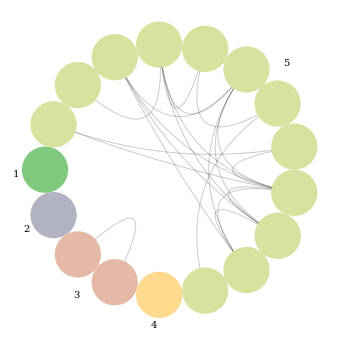

In [127]:
c = nv.plots.CircosPlot(G_labelled,node_grouping="subgraph", node_color="subgraph", 
                        #group_legend=True,
                       group_label_position="middle")
c.draw()
plt.show() 

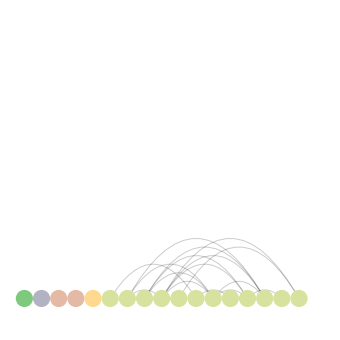

In [136]:
arc = nv.plots.ArcPlot(G_labelled,node_grouping="subgraph", node_color="subgraph"
                      # , node_size="followerCount"
                      )
arc.draw()
plt.show() 